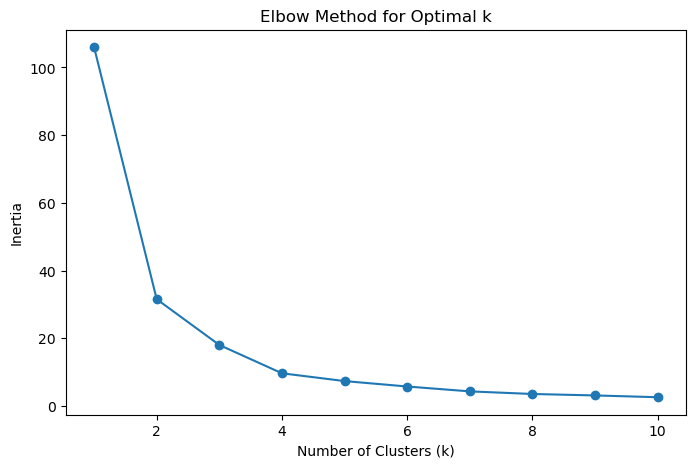

          Age  IncomeLevel  CustomerTenure  Cluster
27   0.430464            1        0.882060        0
96   0.225166            2        0.083056        1
127  0.470199            1        0.488372        0
158  0.384106            1        0.081949        0
160  0.304636            2        0.996678        1


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from datetime import datetime

# Load dataset
file_path = '/Users/samleonor/Desktop/ITDA/DMP:MLPA/CSeg.csv'
df = pd.read_csv(file_path)

# Drop CustomerID (not useful for clustering)
df.drop(columns=['CustomerID'], inplace=True)

# Convert Age to numeric, handling non-numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age']] = imputer.fit_transform(df[['Age']])

# Convert SignupDate to Customer Tenure (days since signup)
df['SignupDate'] = pd.to_datetime(df['SignupDate'], format='%d/%m/%Y', errors='coerce')
df['CustomerTenure'] = (datetime.today() - df['SignupDate']).dt.days
df.drop(columns=['SignupDate'], inplace=True)

# Encode categorical variables
le_income = LabelEncoder()
df['IncomeLevel'] = le_income.fit_transform(df['IncomeLevel'].astype(str))

# Normalize numerical features
scaler = MinMaxScaler()
df[['Age', 'CustomerTenure']] = scaler.fit_transform(df[['Age', 'CustomerTenure']])

# Drop non-numeric columns
df.drop(columns=['Location', 'Gender'], inplace=True)

# Select only numerical columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

# Handle remaining missing values
df_numeric.dropna(inplace=True)

# Determine optimal k using Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means clustering with chosen k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(df_numeric)

print(df_numeric.head())